<div style="text-align: center;">
    
# From Play to Stats: The Science of Dota 2
    
 ## by Zach Balgut Tan



# Introduction

Dota 2 is one of the most popular and influential multiplayer online battle arena (MOBA) games in the world, developed and published by Valve Corporation. The game is a sequel to Defense of the Ancients (DotA), a Warcraft III mod that became a groundbreaking title in the MOBA genre.

In Dota 2, two teams of five players each compete in a strategic, fast-paced match with the ultimate goal of destroying the opposing team's Ancient, a core building located within their base. The game is renowned for its deep complexity, high skill ceiling, and the enormous variety of heroes, items, and strategies that players can utilize to achieve victory. A video summarizing the game of Dota 2 can be found [here](https://www.youtube.com/watch?v=m5sjA6W3nPw&ab_channel=IAmYourTargetDemographic).

I first started playing the original DotA when I was 12 years old, my cousins introduced me to the game and I instantly fell in love with it. I stopped playing the game for a few years, until my friend introduced Dota 2 to me in 2015. Since I have already played the original DotA, it wasn't difficult to pick up Dota 2 since they basically have the same heroes, items, and game objectives. Dota 2 boasts high-quality 3D graphics, with fully realized character models, detailed environments, and was designed for modern gaming hardware. The game looks much more polished than the original DotA, which is another reason why I fell back in love with the game.

# Purpose of this analysis?

To date, I have over 4000+ games in Dota 2. I absolutely love this game, as there are layers of complexity and strategy to it. 

I majored in Applied Statistics while I was in college. After taking classes in Python Pandas programming and statistical analysis, I realize that I can use the skills I learned to analyze one of my favorite hobby, which is playing Dota 2! When I realize that all of my match data is available to be downloaded, I was estatic as this is a project that I know I can complete and all of it is from my own personal data.

The purpose of this analysis **to understand what variables will increase my probability of winning**. Besides that, I am also looking for insights into my general gameplay, such as favorite types of heroes, duration of games, etc. This is to provide some statistical evidence about my game performance from more than thousands of games that I have played.

This is a personal project of mine that I am excited and proud to be doing. I have spent countless hours playing this game, and I am excited to finally analyze my own data with skills that I have learned throughout the years.


# Data Source

I have downloaded my Dota 2 data from the open-sourced platform called [OpenDota](https://www.opendota.com/). I have requested two types of data from the [API](https://docs.opendota.com/): my personal match data and general hero data, and saved it into CSV files. After that, I will use Python's Pandas module to analyze my data.

# Preparing the Data

Below are my steps to request data from the OpenDota API:

In [1]:
### Imports
import requests
from bs4 import BeautifulSoup
import json

# Data Analysis
import pandas as pd
pd.options.display.max_columns = 50
import datetime # Working with time data
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

### Pulling personal matches

In [ ]:
# API query for Wins
acc_id = 294035585
games_won = {"win":1} # Games won

sess = requests.Session()
html = r"https://api.opendota.com/api/players/{}/matches".format(acc_id)
response = sess.get(html, params=games_won)

content = response.content.decode("utf-8")
wins = json.loads(content)

# API query for Losses
games_lost = {"win": 0} # Games lost
response = sess.get(html, params=games_lost)

content = response.content.decode("utf-8")
losses = json.loads(content)

In [ ]:
# Exporting wins data into a spreadsheet

# Specify the filename
filename = 'Wins.csv'

# Open the file for writing
with open(filename, 'w') as file:
    # Write the header
    header = ','.join(wins[0].keys()) # Get the keys from the first dictionary
    file.write(header + '\n') # Write header followed by a newline
    
    # Write the data
    for entry in wins:
        row = ','.join(str(entry[key]) for key in entry) # Convert each value to string and join with commas
        file.write(row + '\n') # Write each row followed by a newline
        
print(f"Data exported to {filename}")


# Exporting losses data into a spreadsheet

# Specify the filename
filename = 'Losses.csv'

# Open the file for writing
with open(filename, 'w') as file:
    # Write the header
    header = ','.join(losses[0].keys()) # Get the keys from the first dictionary
    file.write(header + '\n') # Write header followed by a newline
    
    # Write the data
    for entry in losses:
        row = ','.join(str(entry[key]) for key in entry) # Convert each value to string and join with commas
        file.write(row + '\n') # Write each row followed by a newline
        
print(f"Data exported to {filename}")

### Pulling Hero details

In [25]:
# API query for hero details
sess = requests.Session()
html = r"https://api.opendota.com/api/heroes"
response = sess.get(html)

content = response.content.decode("utf-8")
heroes = json.loads(content)

# Creating Heroes csv

pd.DataFrame(heroes).to_csv('Heroes.csv',index=False)

### Combining personal matches and hero details

In [ ]:
# Opening wins spreadsheet

# filename for final file
filename = 'My_Dota_Matches.csv'

#Open Wins file for writing
df = pd.read_csv('Wins.csv')

#Open Losses file for writing
df2 = pd.read_csv('Losses.csv')

# Adding result of matches
df['result']=1
df2['result']=0

# Dropping unwanted columns
df = df.drop(columns = ['version','lobby_type','game_mode','average_rank','leaver_status','party_size','hero_variant'])
df2 = df2.drop(columns = ['version','lobby_type','game_mode','average_rank','leaver_status','party_size','hero_variant'])

#Combining Wins and Losses match data into one dataframe

# Combine wins and loss games using concat()
Matches_df = pd.concat([df, df2])

## combine games data with hero data
merged_df = pd.merge(Matches_df, heroes_df, on='hero_id')

# DataFrame 1: Personal Match Data

This first dataset contains information on every match of Dota 2 I have ever played.

In [2]:
## Load the data
data = pd.read_csv('dota_stats.csv')
headers = data.columns
headers # List of data variables

Index(['match_id', 'radiant_win', 'duration', 'start_time', 'kills', 'deaths',
       'assists', 'result', 'localized_name', 'primary_attr', 'attack_type',
       'roles', 'legs'],
      dtype='object')

Below is a list of the data variables recorded for each match, along with their definitions:

1. match_id: The unique match id for the games I played. 
2. radiant_win: Whether the team on the Radiant side won the game. 1 = True, 0 = False.
3. duration: The duration of the game, shown in seconds.
4. start_time: The exact time that the game started, shown in seconds, since January 1st, 1970.
5. kills: The number of enemy heroes killed by me in the match.
6. deaths: The number of deaths that I have in the match.
7. assists: The number of assists I have in the match.
8. result: Shows if the team I was in won the game or not. 1 = Win, 0 = Loss.
9. localized_name: The name of the hero I played.
10. primary_attr: The primary attritube of the hero I played. str = Strength hero, agi = Agility hero, int = Intelligence hero, all = Universal hero.
11. attack_type: Attack type of the hero, can either be Melee or Ranged.
12. roles: Shows the typical roles of the hero I am playing. Roles are Carry, Jungler, Pusher, Nuker, Disabler, Initiator, Durable, and Support.
13. legs: The Number of legs of the heroes I played.


So to begin, how many games have I played?

In [3]:
total_games = len(data)
total_games

4756

That is a lot of games!

Here is what the Match dataframe looks like now:

In [4]:
data.head()

,match_id,radiant_win,duration,start_time,kills,deaths,assists,result,localized_name,primary_attr,attack_type,roles,legs
0,8026335255,True,1769,1731130729,13,2,11,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2
1,7980318719,True,1528,1728484796,3,4,6,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2
2,7708633106,True,2455,1714247550,17,4,18,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2
3,7703624798,True,2096,1714016194,6,3,17,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2
4,7611504048,True,1819,1709085344,7,4,11,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2


### Cleaning the Data

There are a few things we can clean in order make the data better for future analysis. 

First, we convert the 'duration' variable from seconds to minutes. Next, I will use the Python's datetime module to make the start_time timestamp into year, month, day, and hour variables in the dataframe.

In [5]:
# duration variable

data['duration']=round(data['duration']/60)

In [6]:
#timestamp variable

year = []
month = []
day = []
hour = []
for i in data['start_time'].index:
    ts = datetime.datetime.fromtimestamp((data['start_time'][i]))
    year.append(ts.year)
    month.append(ts.month)
    day.append(ts.day)
    hour.append(ts.hour)
    
data.insert(3, 'year',year)
data.insert(4, 'month', month)
data.insert(5, 'day', day)
data.insert(6, 'hour', hour)
data.drop('start_time', axis = 1, inplace = True)

After the time variables are formatted, here is what the DataFrame looks like:

In [7]:
data.head()

,match_id,radiant_win,duration,year,month,day,hour,kills,deaths,assists,result,localized_name,primary_attr,attack_type,roles,legs
0,8026335255,True,29.0,2024,11,9,5,13,2,11,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2
1,7980318719,True,25.0,2024,10,9,15,3,4,6,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2
2,7708633106,True,41.0,2024,4,27,20,17,4,18,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2
3,7703624798,True,35.0,2024,4,25,4,6,3,17,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2
4,7611504048,True,30.0,2024,2,28,1,7,4,11,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2


Next, I am going to split the values in primary_attr and attack_type into new variables, this will make it easier for manipulation later on.

In [8]:
primary_attr = pd.get_dummies(data['primary_attr'])
attack_type = pd.get_dummies(data['attack_type'])
data = pd.concat([data, primary_attr, attack_type], axis=1)

After that, I will be calculating a new variable and adding it into the DataFrame: Kill/Death/Assist ratio (KDA). KDA is calculated by adding the kills and assists, and dividing the sum of that by the amount of deaths. KDA is a commonly used metric in games to evaluate a player's performance in a match.

Kill/Death/Assist Ratio (KDA) = (kills + assists)/ deaths

In [9]:
kda = (data['kills'] + data['assists']) / data['deaths']
data.insert(21, 'kda', kda)

In [10]:
data.head()

,match_id,radiant_win,duration,year,month,day,hour,kills,deaths,assists,result,localized_name,primary_attr,attack_type,roles,legs,agi,all,int,str,Melee,kda,Ranged
0,8026335255,True,29.0,2024,11,9,5,13,2,11,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2,0,0,0,1,1,12.000000,0
1,7980318719,True,25.0,2024,10,9,15,3,4,6,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2,0,0,0,1,1,2.250000,0
2,7708633106,True,41.0,2024,4,27,20,17,4,18,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2,0,0,0,1,1,8.750000,0
3,7703624798,True,35.0,2024,4,25,4,6,3,17,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2,0,0,0,1,1,7.666667,0
4,7611504048,True,30.0,2024,2,28,1,7,4,11,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2,0,0,0,1,1,4.500000,0


In [11]:
data[data['deaths']==0]

,match_id,radiant_win,duration,year,month,day,hour,kills,deaths,assists,result,localized_name,primary_attr,attack_type,roles,legs,agi,all,int,str,Melee,kda,Ranged
9,7491989287,False,47.0,2023,12,17,1,9,0,19,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2,0,0,0,1,1,inf,0
30,5468050696,True,29.0,2020,6,13,5,9,0,9,1,Dragon Knight,str,Melee,"['Carry', 'Pusher', 'Durable', 'Disabler', 'In...",2,0,0,0,1,1,inf,0
145,6090459309,False,10.0,2021,7,16,4,0,0,0,1,Marci,all,Melee,"['Support', 'Carry', 'Initiator', 'Disabler', ...",2,0,1,0,0,1,NaN,0
385,6669527104,False,28.0,2022,7,20,2,5,0,20,1,Undying,str,Melee,"['Support', 'Durable', 'Disabler', 'Nuker']",2,0,0,0,1,1,inf,0
424,8003645150,False,21.0,2024,10,25,16,5,0,18,1,Shadow Shaman,int,Ranged,"['Support', 'Pusher', 'Disabler', 'Nuker', 'In...",2,0,0,1,0,0,inf,1
847,7103239977,True,6.0,2023,4,12,1,0,0,0,1,Drow Ranger,agi,Ranged,"['Carry', 'Disabler', 'Pusher']",2,1,0,0,0,0,NaN,1
849,7085066524,True,41.0,2023,3,30,23,6,0,5,1,Drow Ranger,agi,Ranged,"['Carry', 'Disabler', 'Pusher']",2,1,0,0,0,0,inf,1
1123,6435352507,True,7.0,2022,2,17,0,0,0,0,1,Venomancer,all,Ranged,"['Support', 'Nuker', 'Initiator', 'Pusher', 'D...",0,0,1,0,0,0,NaN,1
1550,7273972410,True,49.0,2023,8,7,2,15,0,14,1,Juggernaut,agi,Melee,"['Carry', 'Pusher', 'Escape']",2,1,0,0,0,1,inf,0
1589,2041764503,True,29.0,2015,12,30,16,10,0,5,1,Juggernaut,agi,Melee,"['Carry', 'Pusher', 'Escape']",2,1,0,0,0,1,inf,0


I have a few games where I have 0 deaths. This will mess with the KDA calculation since there will be a division by 0. To mitigate this problem, for games that I have no deaths I will divide the ratios by 1 instead.

In [12]:
data.kda[data.deaths==0] = (data.kills[data.deaths == 0] + data.assists[data.deaths == 0]) / 1

C:\Users\zbalg\AppData\Local\Temp\ipykernel_57332\173517703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.kda[data.deaths==0] = (data.kills[data.deaths == 0] + data.assists[data.deaths == 0]) / 1


The roles of the hero in each match is currently stored as a list in the 'roles' variable. I will now split the roles into new variables for ease of future manipulation.

In [14]:
carry =[]
jungler=[]
pusher=[]
nuker=[]
disabler=[]
initiator=[]
durable=[]
support=[]

role_type = ["Carry","Jungler","Pusher","Nuker","Disabler","Initiator","Durable","Support"]

for i in data['roles']:
    if "Carry" in i:
        carry.append(1)
    else:
        carry.append(0)
    if "Jungler" in i:
        jungler.append(1)
    else:
        jungler.append(0)
    if "Pusher" in i:
        pusher.append(1)
    else:
        pusher.append(0)
    if "Nuker" in i:
        nuker.append(1)
    else:
        nuker.append(0)
    if "Disabler" in i:
        disabler.append(1)
    else:
        disabler.append(0)
    if "Initiator" in i:
        initiator.append(1)
    else:
        initiator.append(0)
    if "Durable" in i:
        durable.append(1)
    else:
        durable.append(0)
    if "Support" in i:
        support.append(1)
    else:
        support.append(0)

data.insert(23,'carry',carry)
data.insert(24,'jungler',jungler)
data.insert(25, 'pusher',pusher)
data.insert(26,'nuker',nuker)
data.insert(27,'disabler',disabler)
data.insert(28,'initiator',initiator)
data.insert(29,'durable',durable)
data.insert(30,'support',support)

data.drop('roles', axis=1, inplace=True)


In [15]:
data.head(100)

,match_id,radiant_win,duration,year,month,day,hour,kills,deaths,assists,result,localized_name,primary_attr,attack_type,legs,agi,all,int,str,Melee,kda,Ranged,carry,jungler,pusher,nuker,disabler,initiator,durable,support
0,8026335255,True,29.0,2024,11,9,5,13,2,11,1,Dragon Knight,str,Melee,2,0,0,0,1,1,12.000000,0,1,0,1,1,1,1,1,0
1,7980318719,True,25.0,2024,10,9,15,3,4,6,1,Dragon Knight,str,Melee,2,0,0,0,1,1,2.250000,0,1,0,1,1,1,1,1,0
2,7708633106,True,41.0,2024,4,27,20,17,4,18,1,Dragon Knight,str,Melee,2,0,0,0,1,1,8.750000,0,1,0,1,1,1,1,1,0
3,7703624798,True,35.0,2024,4,25,4,6,3,17,1,Dragon Knight,str,Melee,2,0,0,0,1,1,7.666667,0,1,0,1,1,1,1,1,0
4,7611504048,True,30.0,2024,2,28,1,7,4,11,1,Dragon Knight,str,Melee,2,0,0,0,1,1,4.500000,0,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7595353621,False,41.0,2024,2,19,5,14,2,22,1,Marci,all,Melee,2,0,1,0,0,1,18.000000,0,1,0,0,0,1,1,0,1
96,7575111066,True,46.0,2024,2,8,3,12,4,27,1,Marci,all,Melee,2,0,1,0,0,1,9.750000,0,1,0,0,0,1,1,0,1
97,7504845780,False,41.0,2023,12,25,3,5,8,22,1,Marci,all,Melee,2,0,1,0,0,1,3.375000,0,1,0,0,0,1,1,0,1
98,7349434579,True,36.0,2023,9,24,6,3,5,18,1,Marci,all,Melee,2,0,1,0,0,1,4.200000,0,1,0,0,0,1,1,0,1


#  DataFrame 2: Hero Data

The second dataset I am loading contains information about each hero available in the game. Variables such as hero name, primary attribute, attack type, and roles are available. 

In [16]:
# Reading hero data

heroes_df = pd.read_csv("heroes.csv")

heroes_df.head()

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"['Carry', 'Escape', 'Nuker']",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"['Initiator', 'Durable', 'Disabler', 'Carry']",2
2,3,npc_dota_hero_bane,Bane,all,Ranged,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"['Carry', 'Disabler', 'Nuker', 'Initiator']",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"['Support', 'Disabler', 'Nuker']",2


Similar to the first dataframe, the roles of each hero is currently stored as a list in the 'roles' variable. I will now split the roles into new variables for ease of future manipulation. I will also drop the legs variable as the number of legs of heroes do not affect my gameplay at all.

In [17]:
carry =[]
jungler=[]
pusher=[]
nuker=[]
disabler=[]
initiator=[]
durable=[]
support=[]

role_type = ["Carry","Jungler","Pusher","Nuker","Disabler","Initiator","Durable","Support"]

for i in heroes_df['roles']:
    if "Carry" in i:
        carry.append(1)
    else:
        carry.append(0)
    if "Jungler" in i:
        jungler.append(1)
    else:
        jungler.append(0)
    if "Pusher" in i:
        pusher.append(1)
    else:
        pusher.append(0)
    if "Nuker" in i:
        nuker.append(1)
    else:
        nuker.append(0)
    if "Disabler" in i:
        disabler.append(1)
    else:
        disabler.append(0)
    if "Initiator" in i:
        initiator.append(1)
    else:
        initiator.append(0)
    if "Durable" in i:
        durable.append(1)
    else:
        durable.append(0)
    if "Support" in i:
        support.append(1)
    else:
        support.append(0)

heroes_df.insert(1,'carry',carry)
heroes_df.insert(2,'jungler',jungler)
heroes_df.insert(3, 'pusher',pusher)
heroes_df.insert(4,'nuker',nuker)
heroes_df.insert(5,'disabler',disabler)
heroes_df.insert(6,'initiator',initiator)
heroes_df.insert(7,'durable',durable)
heroes_df.insert(8,'support',support)

heroes_df.drop(['roles','legs'], axis=1, inplace=True)

heroes_df = heroes_df.rename(columns = {'id' : 'hero_id'})

In [19]:
heroes_df.head()

,hero_id,carry,jungler,pusher,nuker,disabler,initiator,durable,support,name,localized_name,primary_attr,attack_type
0,1,1,0,0,1,0,0,0,0,npc_dota_hero_antimage,Anti-Mage,agi,Melee
1,2,1,0,0,0,1,1,1,0,npc_dota_hero_axe,Axe,str,Melee
2,3,0,0,0,1,1,0,1,1,npc_dota_hero_bane,Bane,all,Ranged
3,4,1,0,0,1,1,1,0,0,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee
4,5,0,0,0,1,1,0,0,1,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged


#  Analysis

## Win/Loss Ratio

Now, let's get to the fun part. I will measure my overall win/loss ratio to determine if I am good at the game.

In [20]:
wins = len(data[data['result'] == 1])
wins_pct = round(wins/total_games, 3) * 100
losses = len(data[data['result'] == 0])
losses_pct = round(losses/total_games, 3) * 100

print('Wins: {} ({}%)'.format(wins, wins_pct))
print('Losses: {} ({}%)'.format(losses, losses_pct))

Wins: 2393 (50.3%)
Losses: 2363 (49.7%)


It seems that on average, I am currently at a positive win rate! However I personally thought that I would have a higher win rate in my games. Given that I have been playing this game for 10 years now, I assume that I would have gotten better as time passes. Still, a positive win rate is still a win!

## Radiant/ Dire Advantage

In a game of Dota, you get placed into one of two teams: Radiant or Dire. There aren't any definitive advantages received being placed in any of the teams, however the map on each side of the battlefield is slightly different, where cliffs and jungle camps are asymmetrical. Let us take a look at my data:

In [21]:
radiant_wins  = data['radiant_win'].value_counts()

print('Radiant Wins: {}%'.format(round(radiant_wins[1]/len(data), 3) *100))
print('Dire Wins: {}%'.format(round(radiant_wins[0]/len(data), 3) *100))


Radiant Wins: 52.1%
Dire Wins: 47.9%


This shows that in the games that I have played, the Radiant team wins 52.1% while Dire wins 47.9% of the time. There appears to be a slight advantage if I am on the Radiant side. (Who would have thought!)

## Numerical Distributions

Now, I will analyse my gameplay by taking a look at some of the numerical variables in my dataset. I will use a boxplot to highlight the central tendency, variability, and potential outliers of the dataset. I will focus on the variables that I find interesting: duration, kills, deaths, assists, and KDA.

Text(0.5, 1.0, 'KDA')

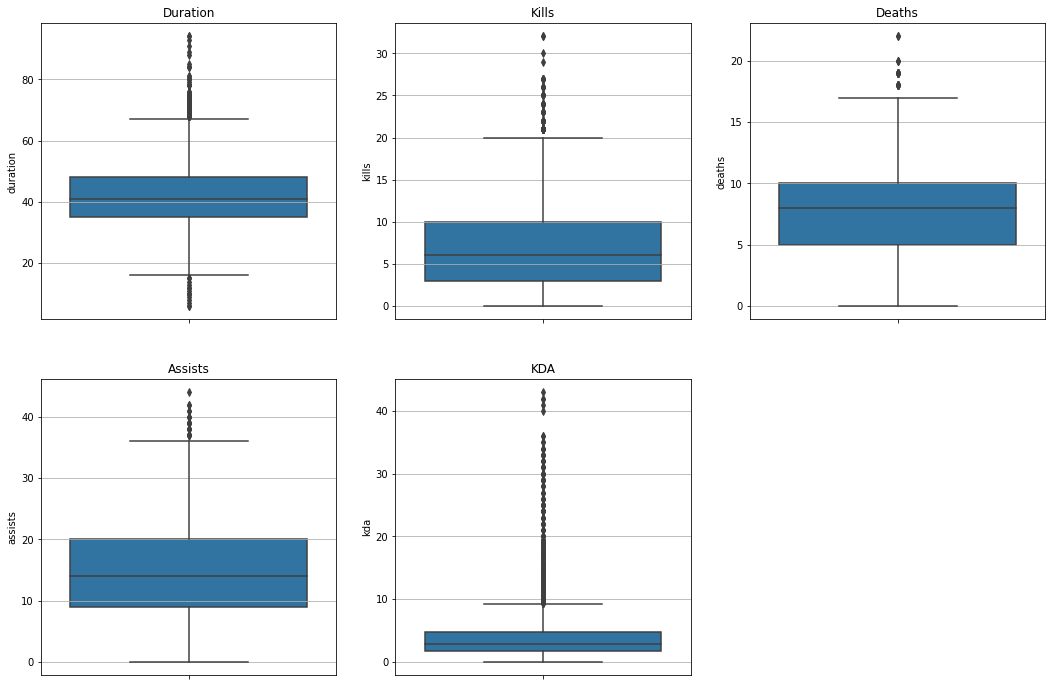

In [22]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.boxplot(y=data['duration'])
plt.grid(True, axis='y')
plt.title('Duration')

plt.subplot(2,3,2)
sns.boxplot(y=data['kills'])
plt.grid(True, axis='y')
plt.title('Kills')

plt.subplot(2,3,3)
sns.boxplot(y=data['deaths'])
plt.grid(True, axis='y')
plt.title('Deaths')

plt.subplot(2,3,4)
sns.boxplot(y=data['assists'])
plt.grid(True, axis='y')
plt.title('Assists')

plt.subplot(2,3,5)
sns.boxplot(y=data['kda'])
plt.grid(True, axis='y')
plt.title('KDA')

I will also use the describe() function to summarize the dataset.

In [23]:
data.describe()

,match_id,duration,year,month,day,hour,kills,deaths,assists,result,legs,agi,all,int,str,Melee,kda,Ranged,carry,jungler,pusher,nuker,disabler,initiator,durable,support
count,4.756000e+03,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.00000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.0,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000
mean,5.601226e+09,41.962784,2020.465728,6.551093,16.044786,9.039319,7.146762,7.781749,14.883726,0.503154,2.14508,0.203953,0.304037,0.344828,0.147183,0.316863,4.084689,0.683137,0.510723,0.0,0.265139,0.717620,0.794365,0.385408,0.234861,0.495374
std,1.799811e+09,10.220764,2.686705,3.326173,8.741545,6.884898,5.107829,3.589664,7.491133,0.500043,1.16953,0.402977,0.460047,0.475362,0.354325,0.465302,4.498466,0.465302,0.499938,0.0,0.441453,0.450205,0.404207,0.486743,0.423957,0.500031
min,1.852121e+09,6.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.020068e+09,35.000000,2018.000000,4.000000,8.000000,4.000000,3.000000,5.000000,9.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,6.096729e+09,41.000000,2021.000000,6.000000,16.500000,6.000000,6.000000,8.000000,14.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.809091,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,7.056741e+09,48.000000,2023.000000,10.000000,23.000000,16.000000,10.000000,10.000000,20.000000,1.000000,2.00000,0.000000,1.000000,1.000000,0.000000,1.000000,4.714286,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,8.026683e+09,94.000000,2024.000000,12.000000,31.000000,23.000000,32.000000,22.000000,44.000000,1.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Duration:

- 50% of my games are between 35 minutes and 48 minutes, with a median of 41 minutes
- The shortest game I have played is 6 minutes, while the longest game I have played is 1 hour 34 minutes. 

Let us take a look if I won my longest and shortest games:

In [24]:
data.loc[data['duration']==6]['result']
data.loc[data['duration']==94]['result']

891    1
907    1
Name: result, dtype: int64

I won both my longest and shortest game. Good news! Losing my longest game would have been disappointing!

### Kills, Deaths, Assists

- I have an average of 7.15 kills, 7.78 deaths and 14.88 assists in my gameplay. The median of my kills, deaths, and assists are 6 kills, 8 deaths, and 14 assists. Given that the averages and the median are not too far off, this means that the outliers do not affect the central tendencies of these variables very much.

- The maximum kills I have is 32, while the maximum deaths I have is 22. Let us have a look if I won these games.

In [26]:
x = data.loc[data['kills']==32]['result']
y = data.loc[data['deaths']==22]['result']

print(x) ## highest kills
print(y) ## highest deaths

1755    1
3378    1
Name: result, dtype: int64
825     0
4466    1
Name: result, dtype: int64


- It seems that I have two games where I got my highest kills of 32, and I won both of them. 
- I have two games where I have my highest deaths, and I won one and lost one of them. For the game that I won, I definitely have to thank my teammates for it!

### KDA

My mean KDA is 4.08. Now let us take a look at my KDA for games that I won and games that I lost. I will look at the median instead of the mean as the games where I have 0 deaths will have higher KDAs, thus will skew the result.


In [27]:
games_won = data[data['result'] == 1]
games_lost = data[data['result'] == 0]

print('Win KDA:', games_won['kda'].median())
print('Loss KDA:', games_lost['kda'].median())

Win KDA: 4.5
Loss KDA: 1.7272727272727273


The games that I have won have a higher KDA than the games that I have lost. This intuitively makes sense as winning games require us to destroy the enemy base. In order for us to do that, we would need to kill the enemy heroes and win teamfights. 

Now, I am crious to take a look at the games where I have a ridiculously high number of kills (28+ kills):

In [28]:
data[data['kills'] > 28]

,match_id,radiant_win,duration,year,month,day,hour,kills,deaths,assists,result,localized_name,primary_attr,attack_type,legs,agi,all,int,str,Melee,kda,Ranged,carry,jungler,pusher,nuker,disabler,initiator,durable,support
1106,1882447396,False,78.0,2015,10,21,16,29,13,16,0,Windranger,all,Ranged,2,0,1,0,0,0,3.461538,1,1,0,0,1,1,0,0,1
1755,7199296932,False,50.0,2023,6,14,1,32,5,13,1,Spirit Breaker,str,Melee,2,0,0,0,1,1,9.000000,0,1,0,0,0,1,1,1,0
3139,3277963465,True,61.0,2017,6,27,19,30,8,20,1,Necrophos,int,Ranged,2,0,0,1,0,0,6.250000,1,1,0,0,1,1,0,1,0
3378,1920187799,False,56.0,2015,11,7,10,32,7,15,1,Mirana,all,Ranged,2,0,1,0,0,0,6.714286,1,1,0,0,1,1,0,0,1


- I have 4 games with kills greater than 28. One thing I noticed is that for all these games I was playing heroes that are carries, which makes sense to me since carry heroes are the ones that deal a lot of damage, thus having a high number of kills. 
- Out of the 4 games, I won 3 and lost 1 of them. Looking at the game I lost, I also have 13 deaths which resulted in a low KDA as well. Turns out a high kill score does not guarantee a match win.

## Hero Stats

There are 126 unique heroes in Dota 2. In every match, each player will control a unique hero character and how you win the game depends on how well you play your hero and how well you coordinate with your teammates. I will now examine my hero statistics.

In [29]:
total_hero_pool = len(heroes_df) ## Number of unique heroes
hero_played = len(data['localized_name'].unique())
hero_played_pct = round(hero_played/total_hero_pool, 2) * 100
print("I have played {} out of {} total heroes at least once, or {}% of the total heroes.".format(hero_played, total_hero_pool, hero_played_pct))

I have played 107 out of 126 total heroes at least once, or 85.0% of the total heroes.


Now let us take a look at my top 10 most played heroes.

Text(0.5, 0, 'Top 10 Most Played Heroes')

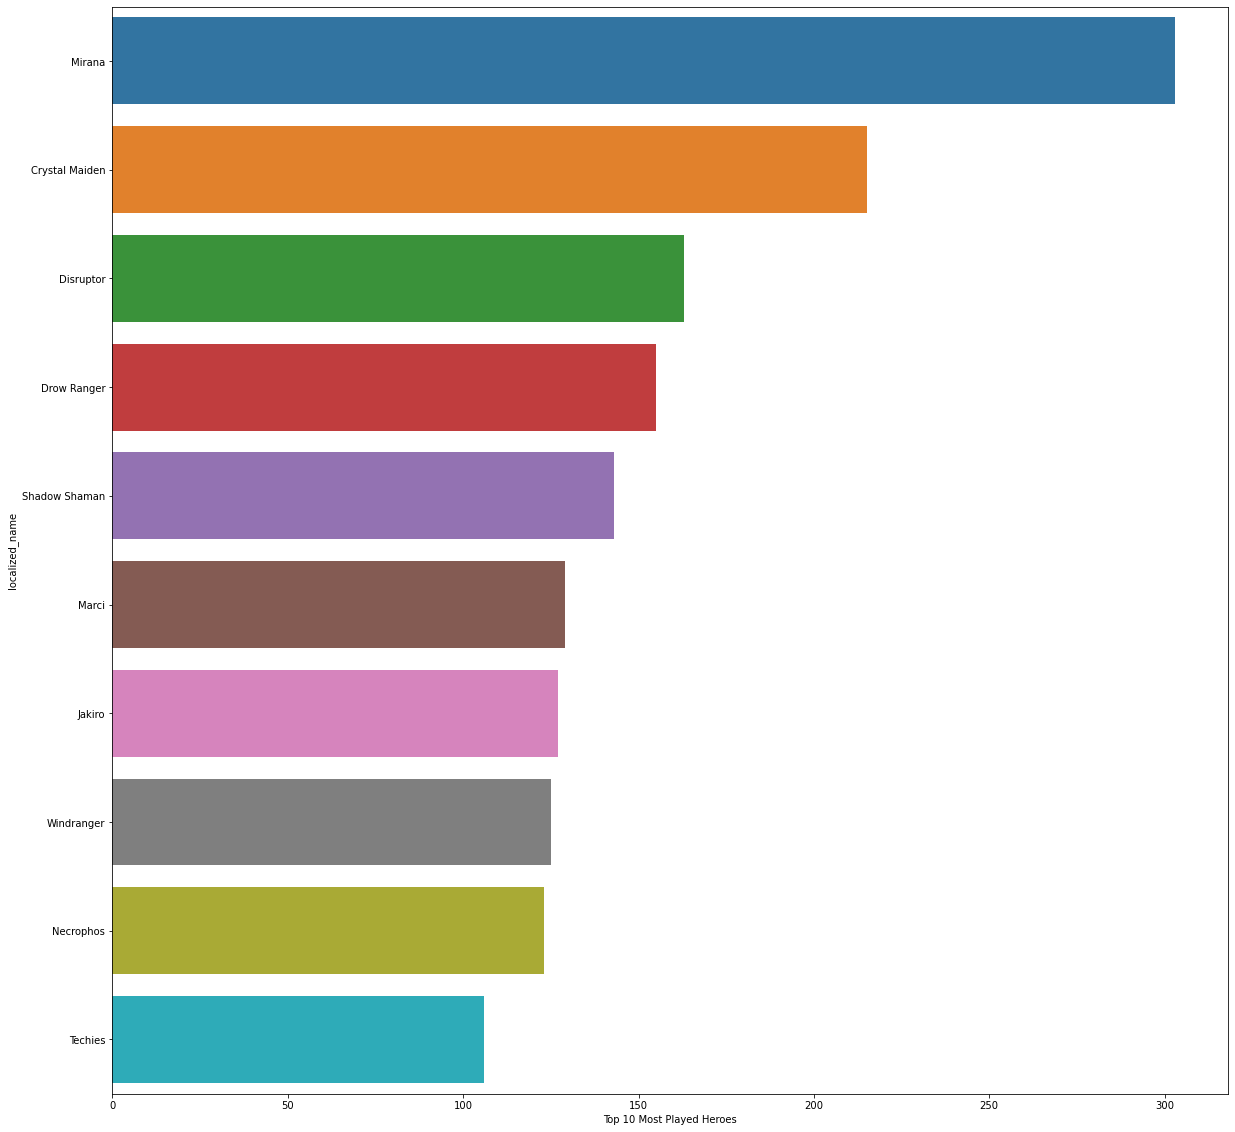

In [30]:
# top 10 most played heroes
plt.figure(figsize=(20,20))
hero = data.groupby('localized_name')
hero_most_played = hero['result'].count().sort_values(ascending=False)
top10_hero_most_played = hero_most_played[:10]
sns.barplot(x = top10_hero_most_played, y = top10_hero_most_played.index)
plt.xlabel('Top 10 Most Played Heroes')

In [31]:
top10 = 0
for hero in top10_hero_most_played.index:
    times_played = len(data[data['localized_name'] == hero])
    times_played_pct = round(times_played / total_games, 3) * 100
    print("I have played {} {} times, or {}% of my total games.".format(hero, times_played, round(times_played_pct,3)))
    top10 += times_played
    
print()
print("I have played my top 10 heroes {} times, or {}% of my total games.".format(top10, round(top10/total_games*100,1)))

I have played Mirana 303 times, or 6.4% of my total games.
I have played Crystal Maiden 215 times, or 4.5% of my total games.
I have played Disruptor 163 times, or 3.4% of my total games.
I have played Drow Ranger 155 times, or 3.3% of my total games.
I have played Shadow Shaman 143 times, or 3.0% of my total games.
I have played Marci 129 times, or 2.7% of my total games.
I have played Jakiro 127 times, or 2.7% of my total games.
I have played Windranger 125 times, or 2.6% of my total games.
I have played Necrophos 123 times, or 2.6% of my total games.
I have played Techies 106 times, or 2.2% of my total games.

I have played my top 10 heroes 1589 times, or 33.4% of my total games.


33.4% of my total games, it is clear that I have my favorite heroes, and I play them a lot! Now I would like to look at my win rate for these heroes.

In [32]:
top10_winrate=[]
for hero in top10_hero_most_played.index:
    top10_wins = data[data['localized_name']==hero]['result'].sum()
    top10_games = data[data['localized_name']==hero]['localized_name'].count()
    top10_wins_pct = round(top10_wins/top10_games,3) * 100
    top10_winrate.append(top10_wins_pct)


Text(0.5, 0, 'W/L Ratio')

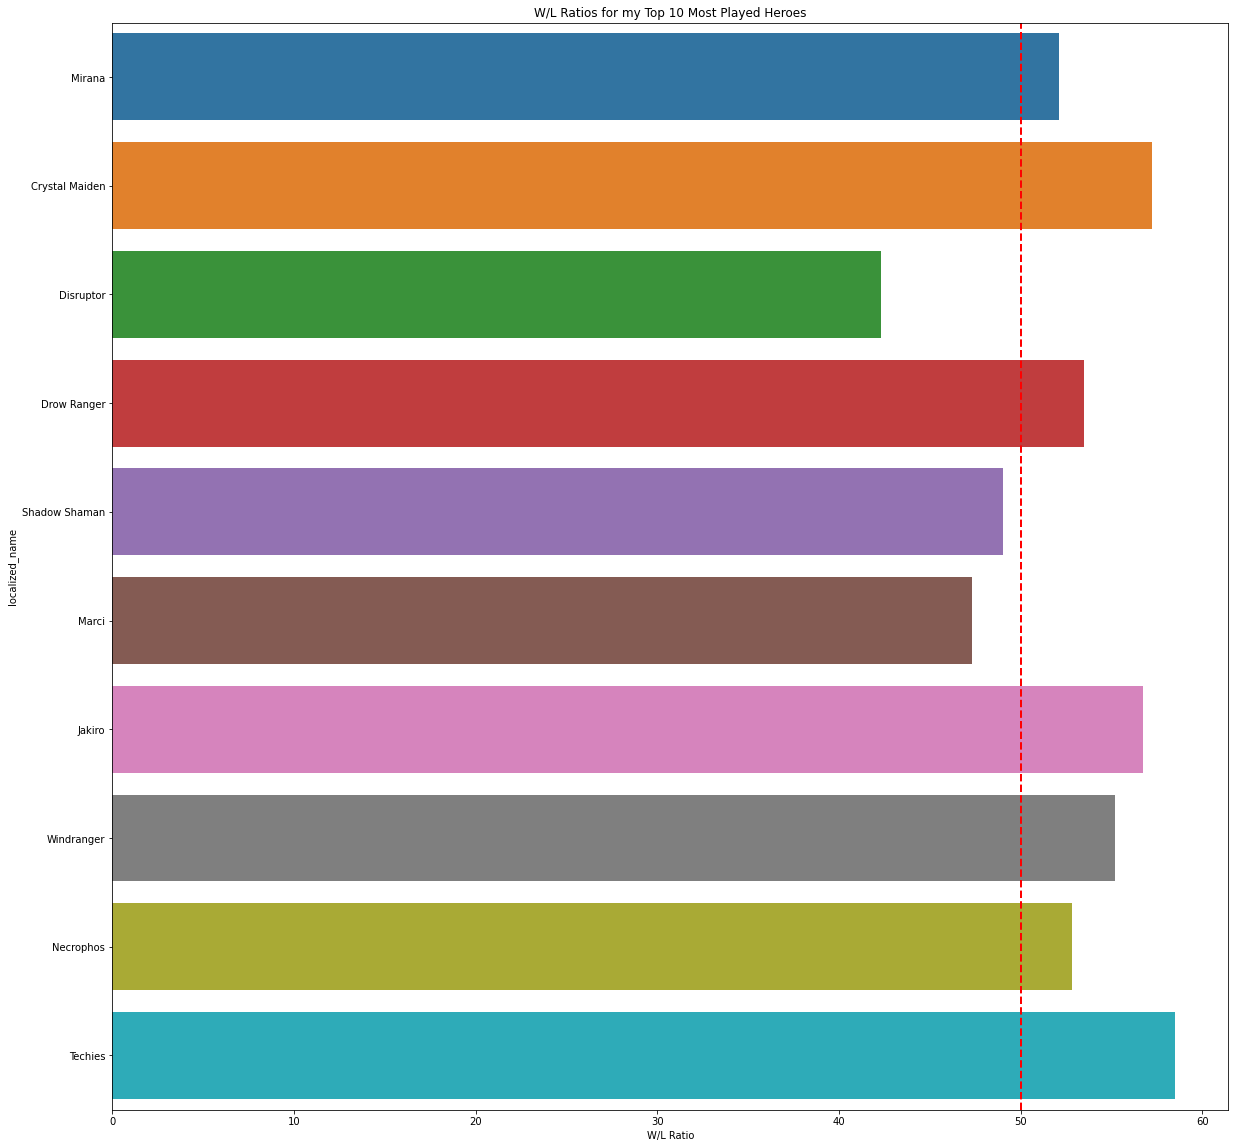

In [33]:
#Calculating  winrate
top10_winrate=[]
for hero in top10_hero_most_played.index:
    top10_wins = data[data['localized_name']==hero]['result'].sum()
    top10_games = data[data['localized_name']==hero]['localized_name'].count()
    top10_wins_pct = round(top10_wins/top10_games,3) * 100
    top10_winrate.append(top10_wins_pct)

plt.figure(figsize = (20,20))
sns.barplot(x = top10_winrate, y = top10_hero_most_played.index)
# Insert a horizontal red line at y=20
plt.axvline(x=50, color='red', linewidth=2, linestyle='--')
plt.title('W/L Ratios for my Top 10 Most Played Heroes')
plt.xlabel('W/L Ratio')


- Good news is I have a positive winrate for 7 out of 10 of my top 10 heroes. My highest winrates are with Techies, Jakiro, and Crystal Maiden.
- I do have 3 heroes that have a negative winrate, with the lowest being Disruptor. I would have thought with so many games on these heroes, I would have gained the expertise in playing them, that turned out to be False! 

I would like to see the roles of my top10 favorite heroes.

In [34]:
top10_heroes_df = heroes_df[heroes_df['localized_name'].isin(top10_hero_most_played.index)]
print("{} out of 10 of my favorite heroes are carry".format(sum(top10_heroes_df['carry'])))
print("{} out of 10 of my favorite heroes are jungler".format(sum(top10_heroes_df['jungler'])))
print("{} out of 10 of my favorite heroes are pusher".format(sum(top10_heroes_df['pusher'])))
print("{} out of 10 of my favorite heroes are nuker".format(sum(top10_heroes_df['nuker'])))
print("{} out of 10 of my favorite heroes are disabler".format(sum(top10_heroes_df['disabler'])))
print("{} out of 10 of my favorite heroes are initiator".format(sum(top10_heroes_df['initiator'])))
print("{} out of 10 of my favorite heroes are durable".format(sum(top10_heroes_df['durable'])))
print("{} out of 10 of my favorite heroes are support".format(sum(top10_heroes_df['support'])))

5 out of 10 of my favorite heroes are carry
0 out of 10 of my favorite heroes are jungler
3 out of 10 of my favorite heroes are pusher
8 out of 10 of my favorite heroes are nuker
10 out of 10 of my favorite heroes are disabler
3 out of 10 of my favorite heroes are initiator
1 out of 10 of my favorite heroes are durable
7 out of 10 of my favorite heroes are support


It seems that my favorite role to play is disabler, nuker and followed by support. Based on these stats, I like playing heroes that can disable the opponent, with abilities that can stun or silence. My least favorite role is jungler, which makes sense since junglers are not popular in the game anymore as the jungle has been nerfed countless of times by the developers.

I would like to take a look at the KDA ratios of my top 10 favorite heroes. I will focus on the median values instead of the mean, since it will give me numbers that are more resistant to outliers.

In [35]:
top10_hero_most_played_kda = data.groupby('localized_name')['kda'].median()[top10_hero_most_played.index]
top10_hero_most_played_kda

localized_name
Mirana            3.571429
Crystal Maiden    2.285714
Disruptor         2.384615
Drow Ranger       3.300000
Shadow Shaman     2.100000
Marci             2.600000
Jakiro            4.000000
Windranger        3.200000
Necrophos         4.285714
Techies           3.000000
Name: kda, dtype: float64

Text(0.5, 0, 'KDA')

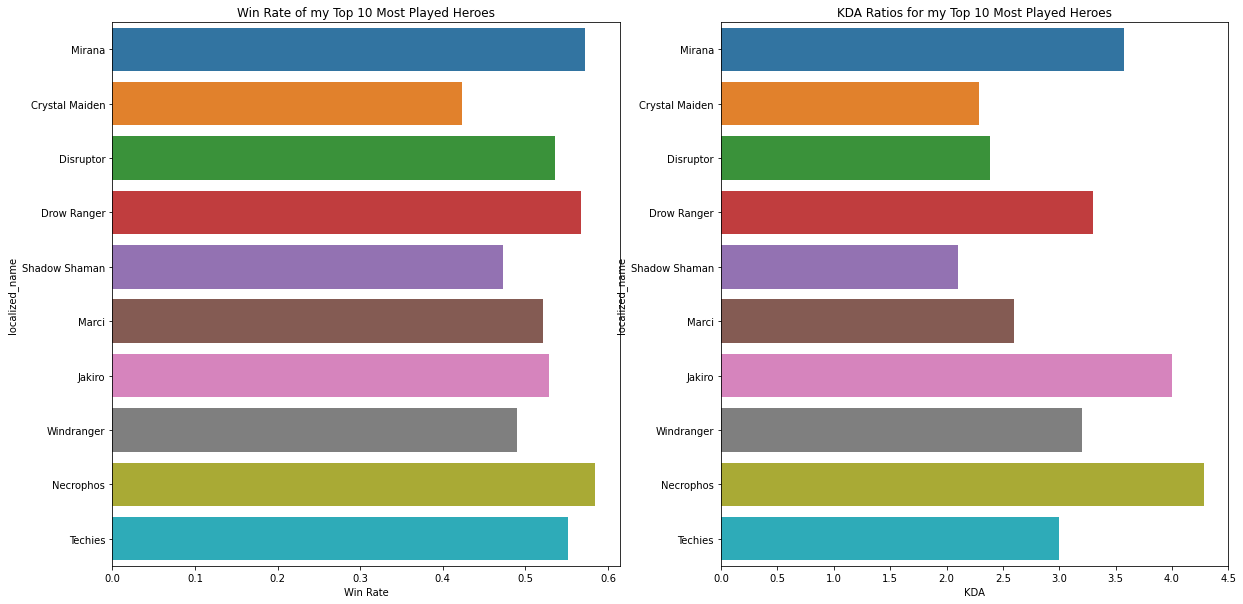

In [36]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
data_top10_heroes_df = data[data['localized_name'].isin(top10_hero_most_played.index)]
herowl = data_top10_heroes_df.groupby('localized_name')
top10_hero_most_played_winrate = herowl['result'].mean()
sns.barplot(x = top10_hero_most_played_winrate, y = top10_hero_most_played.index)
plt.title('Win Rate of my Top 10 Most Played Heroes')
plt.xlabel('Win Rate')

plt.subplot(1,2,2)
sns.barplot(x = top10_hero_most_played_kda, y = top10_hero_most_played.index)
plt.title('KDA Ratios for my Top 10 Most Played Heroes')
plt.xlabel('KDA')

I have included both winrate and KDA graphs for easier comparison.

- By observing both graphs, it shows that for the heroes I have a high KDA with, I also have a good winrate with those heroes. Most notable are Necrophos or Mirana. 
- Necrophos has the highest KDA and win rate, which tells me that I should be playing this hero more if my main goal is just to win games. Mirana being my most played hero also has one of the highest KDAs win rate. It's good to know that I have gotten pretty good at playing my most favorite hero!
- It does not surprise me that I have the lowest KDA for Crystal Maiden and Shadow Shaman in my top 10 most played heroes. These two characters are supports and are known to be very squishy (low health pool and low armor), so my deaths for these heroes are pretty high. This also tells me that I should not feed and die as much if I want to have better impact when playing these two heroes!

## Primary Attribute

There are 4 types of hero attributes: Strength, Agility, Intelligence, and Universal (all). 

- Strength Heroes: For each strength point, it increases strength hero's overall health points and health regeneration rate, and their damage increases by 1 point
- Agility Heroes: For each agility point, it increases the agility hero's attack speed, and their damage increases by 1 point
- Intelligence Heroes: For each intelligence point, it increases intelligence hero's overall mana points and mana regeneration rate, and their damage increases by 1 point
- Universal Heroes: For every attribute (strength, agility, intelligence) that a universal hero gets, their damage increases by 0.4

Each hero gains a certain point of strength, agility, and intelligence when levelling up. Agility and universal heroes are usually carries, as they are able to deal massive amounts of physical attacks in the late game. Strength heroes are typically durable and initiators, as they have a high health pool and they start the fight while surviving as long as possible. Intelligence heroes are typically supports or nukers, as they have high mana points and are able to constantly throw out their spells. 

Now let us take a look at which primary attributes do I play the most, as well as their win rate and KDA ratios.

C:\Users\zbalg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zbalg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'KDA')

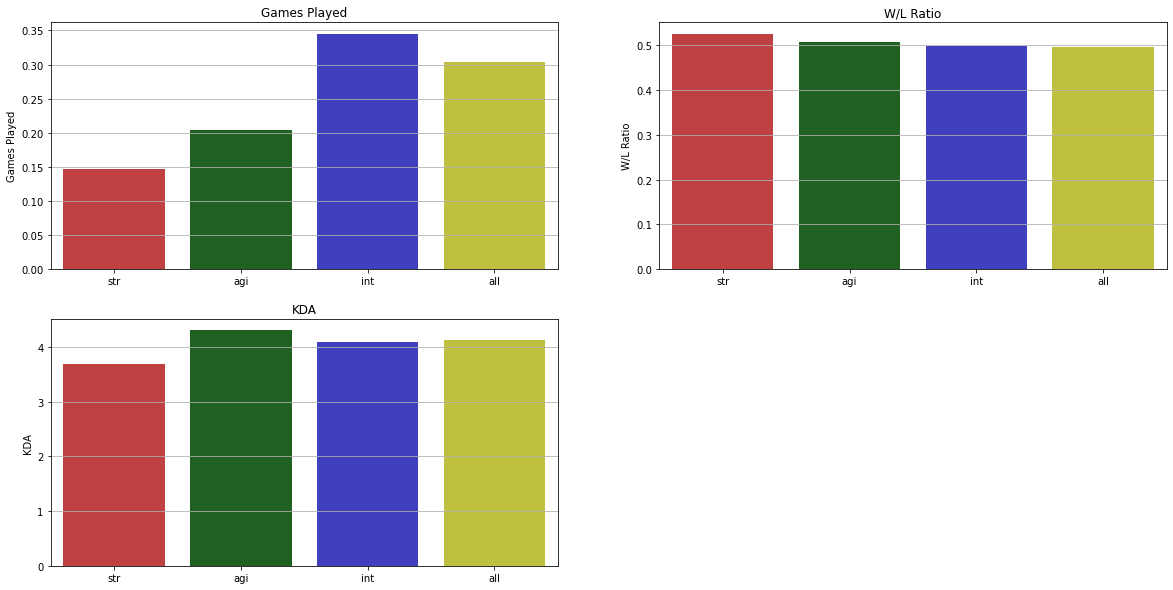

In [37]:
primary_attr = data['primary_attr'].value_counts().reindex(['str','agi','int','all'])
attr_color = ['red','green','blue','yellow']

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.grid(True, axis='y')
sns.barplot(x=primary_attr.index, y = primary_attr/total_games, palette=attr_color, saturation=0.5)
plt.ylabel('Games Played')
plt.title('Games Played')

plt.subplot(2,2,2)
plt.grid(True, axis='y')
primary_attr_winrate = data.groupby('primary_attr')['result'].mean().reindex(['str','agi','int','all'])
sns.barplot(primary_attr.index, primary_attr_winrate, palette=attr_color, saturation=0.5)
plt.ylabel('W/L Ratio')
plt.xlabel('')
plt.title('W/L Ratio')

plt.subplot(2,2,3)
plt.grid(True, axis='y')
primary_attr_kda = data.groupby('primary_attr')['kda'].mean().reindex(['str','agi','int','all'])
sns.barplot(primary_attr.index, primary_attr_kda, palette=attr_color, saturation=0.5)
plt.ylabel('KDA')
plt.xlabel('')
plt.title('KDA')



In [38]:
print(primary_attr_winrate)


primary_attr
str    0.524286
agi    0.507216
int    0.498171
all    0.495851
Name: result, dtype: float64


- I have the highest number of games playing Intelligence heroes at approximately 35%, followed by Universal, Agility, and Strength respectively. 5 out of 10 of my top 10 favorite heroes are Intelligence heroes so this does not surprise me.
- My most played attributes: Intelligence and Universal, have a lower winrate as compared to the other two attributes. If I want to improve on my overall winrate of 50.3%, maybe I should start playing more Strength and Agility heroes instead.
- Looking at my KDA, I have the highest KDA when playing agility heroes and the lowest KDA when playing strength heroes. Agility being my highest KDA makes sense to me, as agility heroes tend to be carries, they typically have a high number of kills. Strength being my lowest KDA shows that I typically play a more sacrificial role on a strength hero, I have high deaths because I typically start the fight sacrifice my hero so that my team would have an advantageous fight scenario.
- Looking at these data, I think I should be playing more Agility heroes as these heroes are the ones where I have the best winrates and the highest impact in my games.

## Attack Type

There are two attack types: Melee and Ranged. Melee heroes attack the enemies at a close range (such as wielding an axe), while Range heroes deal damage from a distance (such as shooting arrows). Now let us analyze my gameplay based on the attack types.

C:\Users\zbalg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zbalg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zbalg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'KDA')

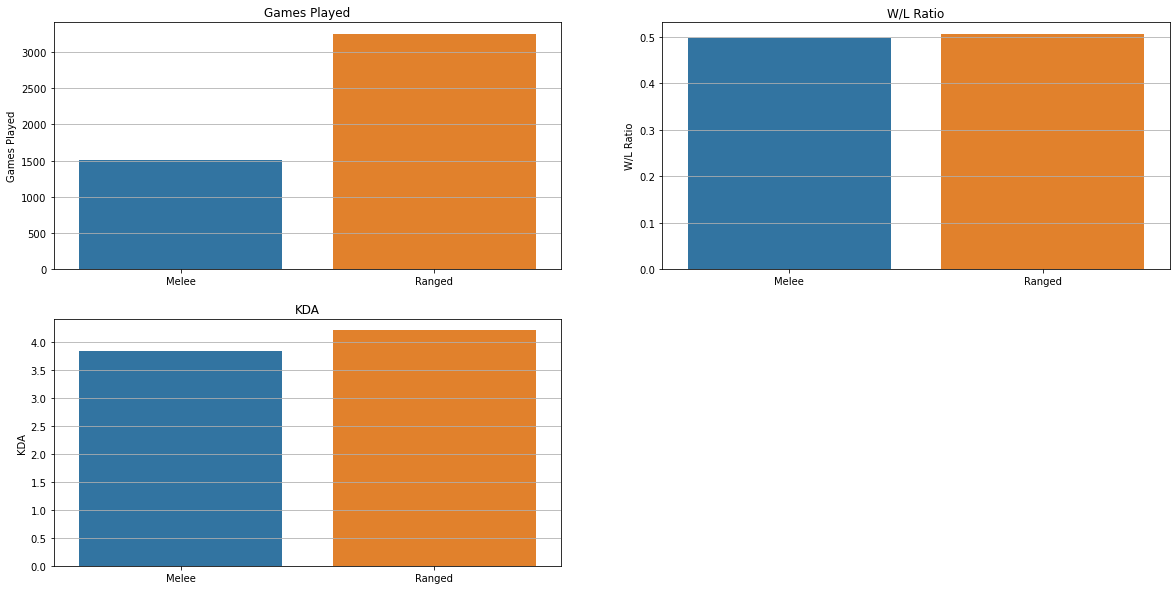

In [39]:
att_type_total = data['attack_type'].value_counts().reindex(['Melee','Ranged'])

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.grid(True, axis='y')
sns.barplot(att_type_total.index, att_type_total)
plt.ylabel('Games Played')
plt.title('Games Played')

plt.subplot(2,2,2)
plt.grid(True, axis='y')
att_type_winrate = data.groupby('attack_type')['result'].mean().reindex(['Melee','Ranged'])
sns.barplot(att_type_total.index, att_type_winrate)
plt.ylabel('W/L Ratio')
plt.xlabel('')
plt.title('W/L Ratio')

plt.subplot(2,2,3)
plt.grid(True, axis='y')
att_type_kda = data.groupby('attack_type')['kda'].mean().reindex(['Melee','Ranged'])
sns.barplot(att_type_kda.index, att_type_kda)
plt.ylabel('KDA')
plt.xlabel('')
plt.title('KDA')

In [40]:
att_type_winrate

attack_type
Melee     0.497014
Ranged    0.506002
Name: result, dtype: float64

- It looks like I have a preference of playing Ranged heroes as compared to Melee heroes, with about 67% of my games being Ranged heroes.
- Looking at the winrates, I am at positive winrate with Ranged heroes and a slightly negative winrate with Melee heroes. However, the values are very close to 50% so attack types do not really affect my winrate.
- Looking at the KDAs, I do have better in-game performance on Ranged heroes.

Now let us look at which primary attributes are typically associated with which attack types:

C:\Users\zbalg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zbalg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zbalg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zbalg\anacond

Text(0, 0.5, '# of Heroes')

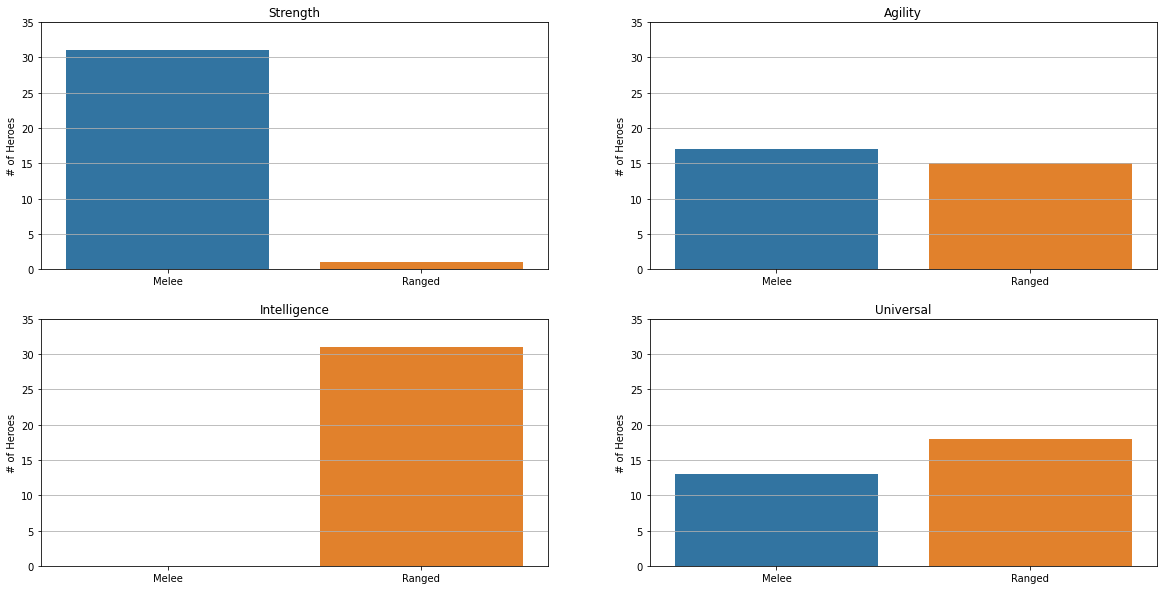

In [41]:
att_type_attr = heroes_df.groupby(['attack_type','primary_attr'])['localized_name'].unique()

if 'str' in att_type_attr['Melee']:
    melee_str = len(att_type_attr['Melee']['str'])
else: melee_str = 0
if 'agi' in att_type_attr['Melee']:
    melee_agi = len(att_type_attr['Melee']['agi'])
else: melee_agi = 0
if 'int' in att_type_attr['Melee']:
    melee_int = len(att_type_attr['Melee']['int'])
else: melee_int = 0
if 'all' in att_type_attr['Melee']:
    melee_all = len(att_type_attr['Melee']['all'])
else: melee_all = 0
if 'str' in att_type_attr['Ranged']:
    ranged_str = len(att_type_attr['Ranged']['str'])
else: ranged_str = 0
if 'agi' in att_type_attr['Ranged']:
    ranged_agi = len(att_type_attr['Ranged']['agi'])
else: ranged_agi = 0
if 'int' in att_type_attr['Ranged']:
    ranged_int = len(att_type_attr['Ranged']['int'])
else: ranged_int = 0
if 'all' in att_type_attr['Ranged']:
    ranged_all = len(att_type_attr['Ranged']['all'])
else: ranged_all = 0

    




str_att_type = [melee_str, ranged_str]
agi_att_type =[melee_agi, ranged_agi]
int_att_type = [melee_int, ranged_int]
all_att_type = [melee_all, ranged_all]
att_type_label = ['Melee','Ranged']

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.grid(True, axis='y')
sns.barplot(att_type_label, str_att_type)
plt.yticks(np.arange(0,40,5))
plt.title('Strength')
plt.ylabel('# of Heroes')

plt.subplot(2,2,2)
plt.grid(True, axis='y')
sns.barplot(att_type_label, agi_att_type)
plt.yticks(np.arange(0,40,5))
plt.title('Agility')
plt.ylabel('# of Heroes')

plt.subplot(2,2,3)
plt.grid(True, axis='y')
sns.barplot(att_type_label, int_att_type)
plt.yticks(np.arange(0,40,5))
plt.title('Intelligence')
plt.ylabel('# of Heroes')

plt.subplot(2,2,4)
plt.grid(True, axis='y')
sns.barplot(att_type_label, all_att_type)
plt.yticks(np.arange(0,40,5))
plt.title('Universal')
plt.ylabel('# of Heroes')

In [42]:
# Ranged Strength Heroes
print(att_type_attr['Ranged']['str'])

['Huskar']


The barplots show the number of melee and ranged heroes for each of the primary attributes.

- The number of agility and universal heroes are more equal to each other. However, we can see that there are significantly more melee strength heroes as compared to ranged strength heroes. In fact, there is only one ranged strength hero in the game, which is Huskar. It makes sense that most strength heroes have melee attack types, the concept of melee heroes being the tanky, durable frontliners is intuitive and consistent. 

- Looking at the barplot for Intelligence heroes, there are only Ranged Intelligence heroes and not a single Melee Intelligence hero. This is due to the core design of Intelligence heroes, they are typically spellcasters and ranged. These heroes have high mana pools and rely on their spells to deal damage. They tend to be more fragile and are lack of natural durability. As such, Intelligence heroes are less suited for the frontlines, where most melee heroes typically operate.


## Time

Dota is a very fun yet addictive game. I have spent many hours playing this game, every since I was a teenager. How many hours have I spent playing this game?

In [43]:
#Calculating number of hours played
hours_played = round(sum(data['duration']/60),1)
days_played = round(hours_played/24,1)
print("I have played {} hours or {} playing Dota2.".format(hours_played, days_played))

I have played 3326.3 hours or 138.6 playing Dota2.


That is a lot of time playing Dota!

I will now look at my number of games over the years.

C:\Users\zbalg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Games Played')

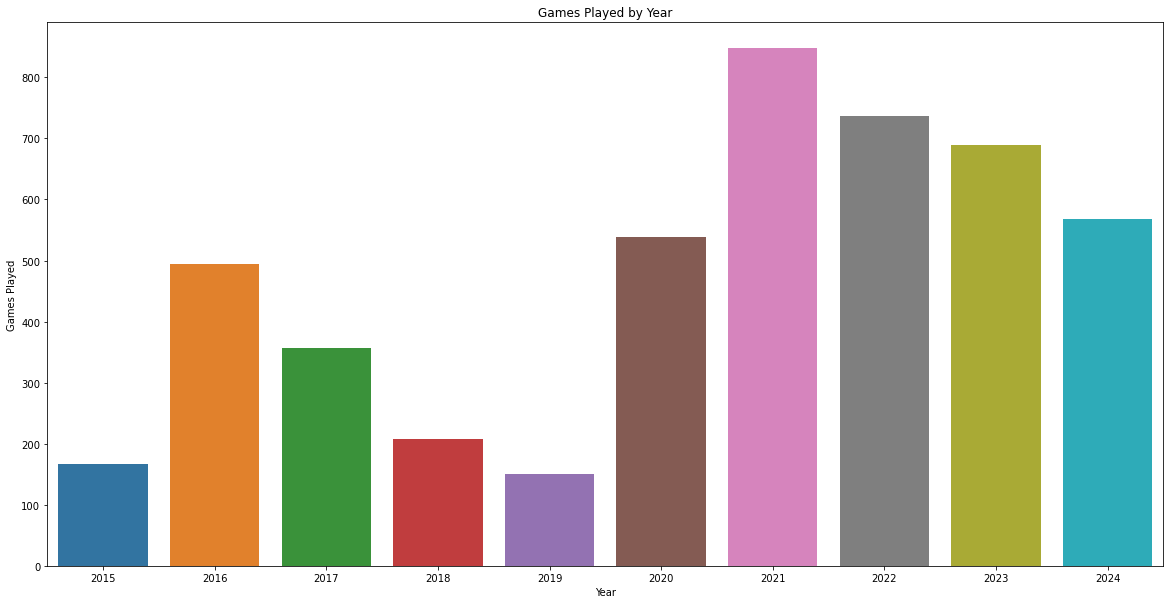

In [44]:
## Games over the years

games_year = data['year'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(games_year.index, games_year)
plt.title('Games Played by Year')
plt.xlabel('Year')
plt.ylabel('Games Played')


- It seems that I played the most Dota 2 games in 2021. 
- We can see that I started playing less games starting in 2017 and it continues to decrease until 2019. This could be explained by me starting my undergraduate studies in 2017, hence having less time for this game.
- There is an uptick of Dota games played in 2020, I believe the reason for this is due to the COVID-19 pandemic. We were required to stay indoors hence having more time for playing games. At least I was staying indoors and I am practicing social distancing!
- Clearly, the COVID-19 pandemic rekindled my love for Dota 2, as my games played every year after 2021 has been higher than 2020.

I would now like to see my winrate over the years.


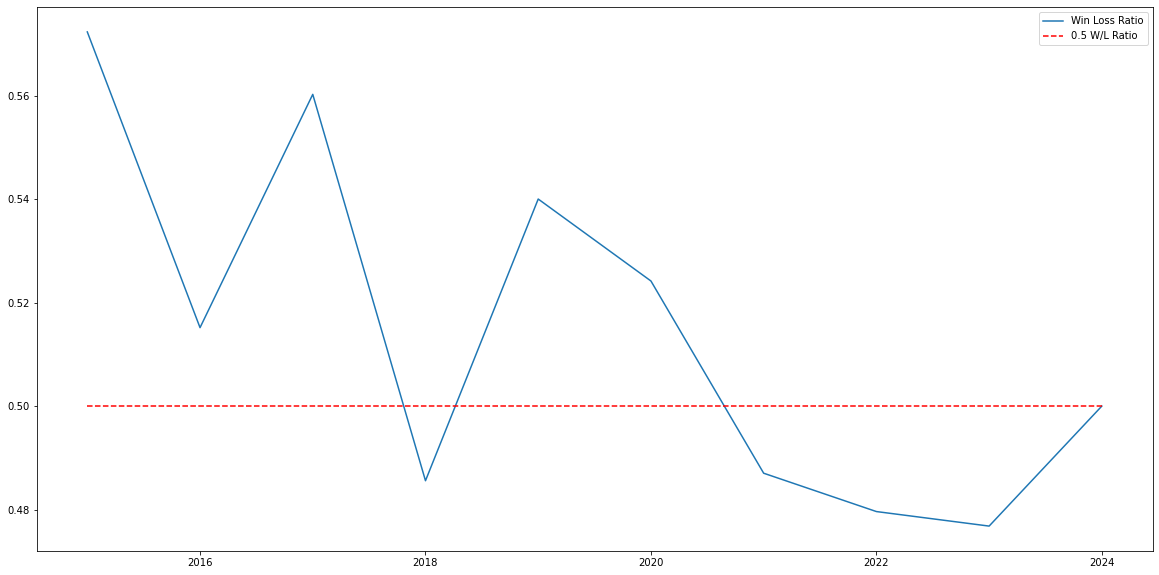

In [45]:
data_years = data.groupby('year')
data_years_winrate = data_years['result'].mean()

plt.figure(figsize = (20,10))
plt.plot(data_years_winrate.index, data_years_winrate, label = 'Win Loss Ratio')
plt.plot(data_years_winrate.index, [0.5 for i in data_years_winrate.index], 'r--', label = '0.5 W/L Ratio')
plt.legend()

Wow this is surprising! I mostly had a positive winrate when I first started playing Dota 2. However, I have a negative winrate in recent years starting in 2021. It means that either my reflexes and game performance had declined since 2021, or other players have just gotten better!

I will now be looking at my W/L ratio and how it varies over different game durations:

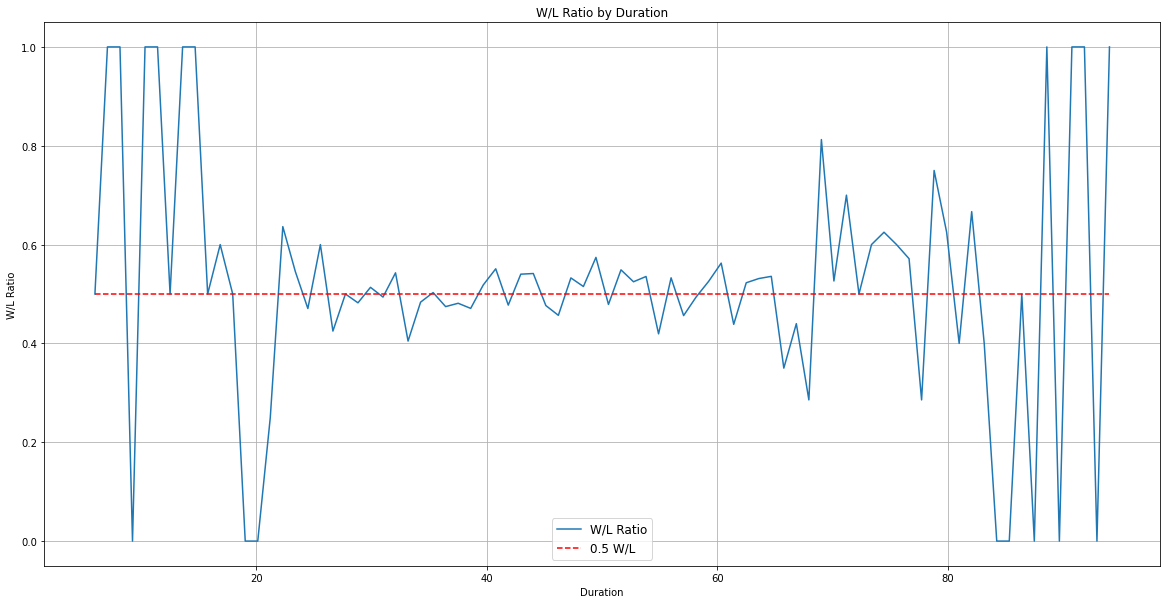

In [46]:
plt.figure(figsize=(20,10))
duration_winrate = data.groupby('duration')['result'].mean()
duration_linspace = np.linspace(data['duration'].min(), data['duration'].max(), num = len(duration_winrate))
plt.plot(duration_linspace, duration_winrate, label='W/L Ratio')
plt.plot(duration_linspace, [0.5 for i in duration_linspace], 'r--', label = '0.5 W/L')

plt.title('W/L Ratio by Duration')
plt.grid(True)
plt.xlabel('Duration')
plt.ylabel('W/L Ratio')
plt.legend(fontsize='large')


- Looking at the W/L ratios, the values fluctuates a lot at the extremities of duration which makes sense since there are not a lot of super short or super long games.
- My winrate for games between 20-40 minutes and 40-60 minutes are consistently hovering at the baseline. However it does seem like I have a better winrate for games between 60 to 80 minutes., which tells me that my late game decision making is pretty good!

### Total Time Playing Dota 2

For the last part of my analysis, I am curious as to how much of my life have I dedicated to playing this game.

In [47]:
print("I have played {} days of Dota 2 in my life.".format(days_played))

I have played 138.6 days of Dota 2 in my life.


In [48]:
total_life_days = 27*365
days_played_pct = round(days_played/total_life_days,3) * 100
print("I have spent {}% of my entire life playing Dota 2.".format(days_played_pct))

I have spent 1.4000000000000001% of my entire life playing Dota 2.


Text(0.5, 1.0, "Zach's Entire Life")

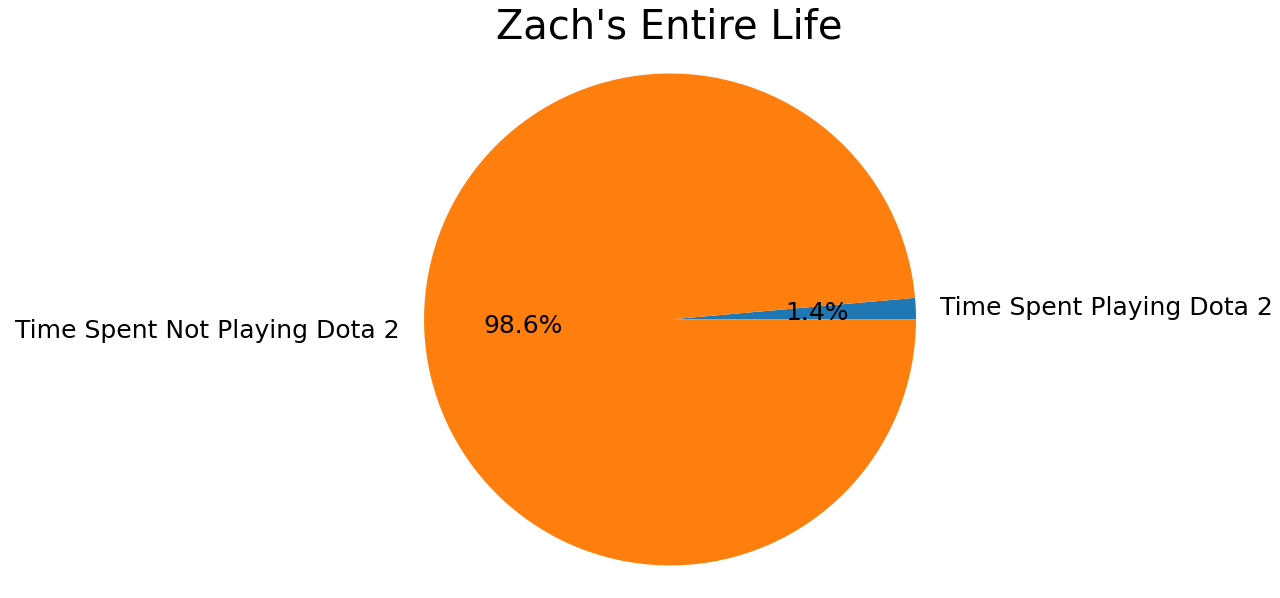

In [49]:
days_not_played_pct = 100 - days_played_pct
plt.figure(figsize=(20,10))
plt.pie([days_played_pct/100, days_not_played_pct/100],
       labels = ['Time Spent Playing Dota 2', ' Time Spent Not Playing Dota 2'],
       autopct='%1.1f%%', textprops={'fontsize': 25})
plt.axis('equal')
plt.title("Zach's Entire Life", fontsize = 40)

1.4% doesn't sound a lot, but considering that is 1.4% of my entire life, that is a lot of time spent on a video game!

Looking at the amount of time spent, perhaps I should slowly phase this game out of my life, the times spent playing this game could have been used for something more useful. HOWEVER, playing Dota 2 is my hobby. It gives me personal fulfillment, entertainment and relaxation during my free time. It is also a way for me to connect with my friends from the past, even though we do not physically hang out anymore due to distance, we are still able to connect and share a moment when playing this game together.

As I get older and gain more responsibilities, I should probably ease out of playing this game (and according to my games played by year it does reflect that), but what is wrong with a little fun once in a while!

<div style="text-align: center;">
    
## Thank you for reading my analysis!